In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyart
import cartopy.crs as ccrs
from pyart.testing import get_test_data
import os


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [37]:
dataDir = "Data/01/1_prt/"
filenames = [dataDir + filename for filename in os.listdir(dataDir)]

In [38]:
# Read in a sample file
radar = pyart.io.read(filenames[0])
# filename = get_test_data("110635.mdv")
# radar = pyart.io.read(filename)


In [ ]:
# radar = pyart.io.read(filenames[0])
# len(radar.elevation["data"].tolist())

radar.range


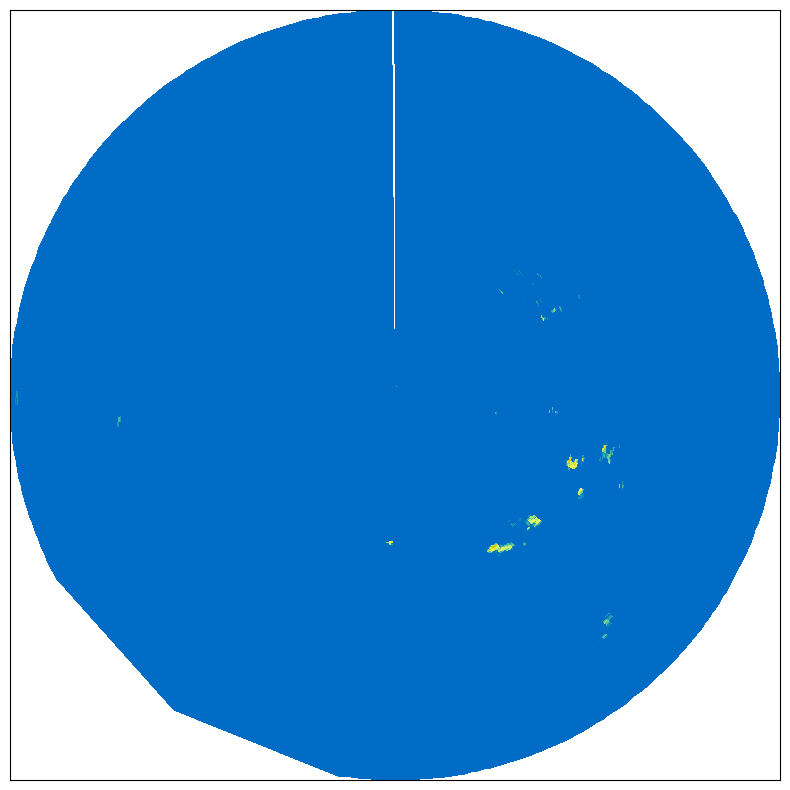

In [62]:

# Calculate composite reflectivity, or the maximum reflectivity across all elevation levels
compz = pyart.retrieve.composite_reflectivity(
    radar, field="reflectivity"
)

# Plot the original reflectivity field and the composite field
fig, ax = plt.subplots(figsize=(8, 8))
composite_display = pyart.graph.RadarDisplay(compz)
composite_display.plot(
    "composite_reflectivity", ax=ax, vmin=35, vmax=70, cmap="pyart_HomeyerRainbow", colorbar_flag=False
)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.grid(False)
plt.tight_layout()

In [60]:
data_img_path = 'Data/model_data/'
def get_date_img(dataPath):
    for i in dataPath:

        data_path = data_img_path + i.split("/")[-1].split(".")[0]+'.png'

        radar = pyart.io.read(i)
        compz = pyart.retrieve.composite_reflectivity(
            radar, field="reflectivity"
        )

        # Plot the original reflectivity field and the composite field
        fig, ax = plt.subplots(figsize=(8, 8))
        composite_display = pyart.graph.RadarDisplay(compz)
        composite_display.plot(
            "composite_reflectivity", ax=ax, vmin=-10, vmax=70, cmap="pyart_HomeyerRainbow", colorbar_flag=False
        )
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title('')
        ax.grid(False)
        plt.tight_layout()
        # Save the plot to a file (e.g., PNG)
        plt.savefig(data_path, bbox_inches='tight')

        # Close the figure
        plt.close()

In [61]:
get_date_img(filenames)